The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


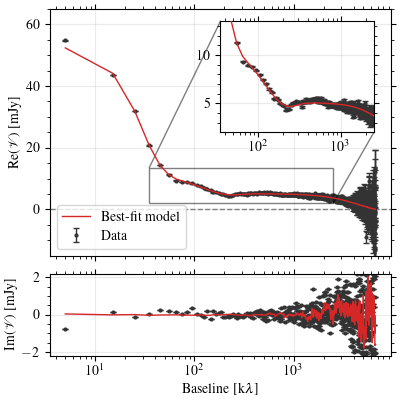

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import eDiskplot as eplot
from matplotlib import ticker
%matplotlib widget
%load_ext autoreload
%autoreload 2

# matplotlib.rcParams["text.latex.preamble"] = [r'\usepackage{amsmath}', r'\usepackage{amssymb}']

filename = "./visibility/L1489IRS_continuum_shift.split.bin_30s.uvprofile.npz"
obsdata = np.load(filename)
uvdist = obsdata["uvdist"]
V = obsdata["V"]
Verr = obsdata["Verr"]

filename = "./L1489IRS_continuum_shift.split.bin_30s.MAP_vis.uvprofile.npz"
modeldata = np.load(filename)
modeluvdist = modeldata["uvdist"]
modelV = modeldata["V"]
modelVerr = modeldata["Verr"]

filename = "./L1489IRS_continuum_shift.bin_30s.doubleGaussian.uvprofile.npz"
imfitdata = np.load(filename)
imfituvdist = imfitdata["uvdist"]
imfitV = imfitdata["V"]
imfitVerr = imfitdata["Verr"]

# oldvis = Visibility("./visibility/L1489IRS_continuum_shift_oldDDT.npz")
# oldvis.deproject(PA=param_dict["PA"], incl=param_dict["incl"])
# oldvis.shift_phase(dRA=-param_dict["dRA"], dDec=-param_dict["dDec"])
# olduvdist, oldV, oldVerr = oldvis.bin_1D()
# filename = "./L1489IRS_continuum_shift_oldDDT.uvprofile.npz"
# np.savez(filename, uvdist=olduvdist, V=oldV, Verr=oldVerr)


fig, axes = plt.subplots(
    2,
    1,
    figsize=(4, 4),
    sharex=True,
    gridspec_kw={"height_ratios": (3, 1)},
    constrained_layout=True,
)

ax = axes[0]
ax.errorbar(uvdist*1e-3, V.real*1e3, yerr=Verr.real*1e3, fmt="o", markersize=2, capsize=2, color="0.2", elinewidth=1.0, label="Data")
ax.plot(modeluvdist*1e-3, modelV.real*1e3, zorder=100, color="tab:red", lw=1.0, label="Best-fit model")
# ax.plot(imfituvdist*1e-3, imfitV.real*1e3, zorder=100, color="grey", lw=1.0, ls="dashed")
# ax.plot(modeluvdist*1e-3, (modelV.real-imfitV.real[imfituvdist<=modeluvdist.max()])*1e3, zorder=100, color="grey", lw=1.0, ls="dashed")
# ax.errorbar(olduvdist, oldV.real, yerr=oldVerr.real, fmt="o", markersize=5, zorder=2000)
ax.axhline(y=0.0, color="grey", ls="dashed", lw=1.0)
ax.set(xscale="log", ylim=(-15, 65), ylabel="Re($\mathcal{V}$) [mJy]")
# formatter = FormatStrFormatter("%.0f")
# ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.minorticks_on()
ax.grid(alpha=0.25)
ax.legend(loc="lower left")

insax = ax.inset_axes([0.5, 0.5, 0.45, 0.45])
insax.errorbar(uvdist*1e-3, V.real*1e3, yerr=Verr.real*1e3, fmt="o", markersize=2, capsize=2, elinewidth=1.0, color="0.2")
insax.plot(modeluvdist*1e-3, modelV.real*1e3, zorder=100, color="tab:red", lw=1.0)
# insax.plot(imfituvdist*1e-3, imfitV.real*1e3, zorder=100, color="grey", lw=1.0, ls="dashed")
xmin, xmax, ymin, ymax = 35, 2.5e3, 2, 13.5
insax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), xscale="log")
insax.minorticks_on()
insax.grid(alpha=0.25)
ax.indicate_inset_zoom(insax, edgecolor="black")
# insax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
# insax.yaxis.set_major_locator(ticker.MultipleLocator(0.04))

ax = axes[1]
ax.errorbar(uvdist*1e-3, V.imag*1e3, yerr=Verr.imag*1e3, fmt="o", markersize=2, capsize=2, elinewidth=1.0, color="0.2")
ax.plot(modeluvdist*1e-3, modelV.imag*1e3, zorder=100, color="tab:red", lw=1.0)
# ax.errorbar(olduvdist, oldV.imag, yerr=oldVerr.imag, fmt="o", markersize=5, zorder=2000)
ax.set(ylim=(-2.2, 2.2), ylabel="Im($\mathcal{V}$) [mJy]", xlabel="Baseline [k$\lambda$]")
ax.minorticks_on()
ax.grid(alpha=0.25)



In [ ]:
fig.savefig("./figure/visibility_profile.pdf", bbox_inches="tight", pad_inches=0.01)

In [10]:
modeluvdist.max(), imfituvdist.max()

(6645000.0, 7745000.0)

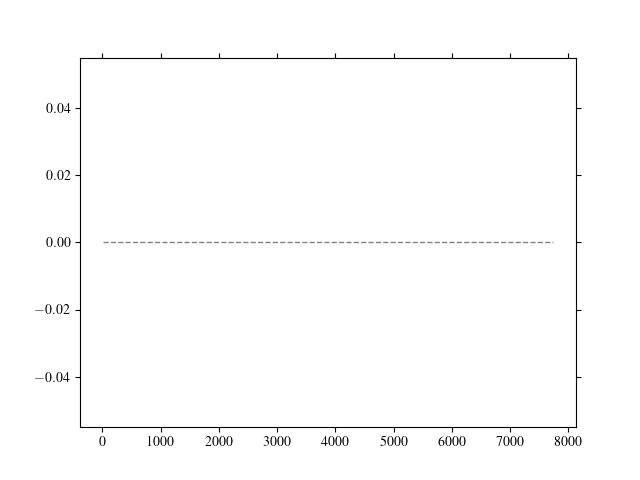

In [2]:
fig, ax = plt.subplots()
ax.plot(imfituvdist*1e-3, imfitV.real*1e3, zorder=100, color="grey", lw=1.0, ls="dashed")